In [33]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import string

In [20]:
def cosineSimilarity(vec1,vec2):
    """Calculate the cosine similarity between two vectors"""
    v1 = np.array(vec1)
    v2 = np.array(vec2)
    cosine = np.dot(v1,v2)/(norm(v1)*norm(v2))
    return cosine

In [42]:
sentences = [
    "As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead",
    "Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities",
    "With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth",
    "The mild spring weather marks the transition from the cold winter to the inviting warmth of summer",
    "During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun",
    "Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight",
    "The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring",
    "As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring",
    "The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring",
    "Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure"
]

sentences = [("".join(char for char in sentence if char not in string.punctuation).lower()) for sentence in sentences]

df = pd.DataFrame(0, index=sentences, columns=sentences)
for sentenceA in sentences:
    for sentenceB in sentences:
        wordListA = set(sentenceA.lower().split())
        wordListB = set(sentenceB.lower().split())
        overlap = wordListA.intersection(wordListB)
        df.loc[sentenceA, sentenceB] = len(overlap)
df

,as spring unfolds the warmth of the season encourages the first blossoms to open signaling longer days ahead,spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities,with the arrival of spring people begin planning their summer vacations eager to enjoy the seasonal warmth,the mild spring weather marks the transition from the cold winter to the inviting warmth of summer,during spring families often start spending more time outdoors enjoying the seasons pleasant temperatures and the promise of summer fun,summer continues the seasons trend of growth and warmth with gardens full of life and days filled with sunlight,the summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring,as summer arrives the warm weather invites a continuation of the outdoor activities that people began enjoying in spring,the transition into summer brings even warmer temperatures allowing for beach visits and swimming much awaited since the spring,summer vacations are often planned as the days grow longer a pattern that starts in the spring culminating in peak summer leisure
as spring unfolds the warmth of the season encourages the first blossoms to open signaling longer days ahead,16,4,5,5,3,4,3,4,2,5
spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities,4,16,3,3,4,4,4,5,4,3
with the arrival of spring people begin planning their summer vacations eager to enjoy the seasonal warmth,5,3,16,6,4,5,4,5,3,4
the mild spring weather marks the transition from the cold winter to the inviting warmth of summer,5,3,6,14,4,4,3,5,4,3
during spring families often start spending more time outdoors enjoying the seasons pleasant temperatures and the promise of summer fun,3,4,4,4,19,5,5,5,5,4
summer continues the seasons trend of growth and warmth with gardens full of life and days filled with sunlight,4,4,5,4,5,16,4,3,3,3
the summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring,3,4,4,3,5,4,17,8,4,5
as summer arrives the warm weather invites a continuation of the outdoor activities that people began enjoying in spring,4,5,5,5,5,3,8,18,3,7
the transition into summer brings even warmer temperatures allowing for beach visits and swimming much awaited since the spring,2,4,3,4,5,3,4,3,18,3
summer vacations are often planned as the days grow longer a pattern that starts in the spring culminating in peak summer leisure,5,3,4,3,4,3,5,7,3,19


In [40]:
matrix = df.to_numpy()

cosineDF = pd.DataFrame(0, columns=sentences, index=sentences)
for i in range(len(sentences)):
    for j in range(len(sentences)):
        cosineDF.loc[sentences[i], sentences[j]] = cosineSimilarity(matrix[i], matrix[j])
cosineDF

,as spring unfolds the warmth of the season encourages the first blossoms to open signaling longer days ahead,spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities,with the arrival of spring people begin planning their summer vacations eager to enjoy the seasonal warmth,the mild spring weather marks the transition from the cold winter to the inviting warmth of summer,during spring families often start spending more time outdoors enjoying the seasons pleasant temperatures and the promise of summer fun,summer continues the seasons trend of growth and warmth with gardens full of life and days filled with sunlight,the summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring,as summer arrives the warm weather invites a continuation of the outdoor activities that people began enjoying in spring,the transition into summer brings even warmer temperatures allowing for beach visits and swimming much awaited since the spring,summer vacations are often planned as the days grow longer a pattern that starts in the spring culminating in peak summer leisure
as spring unfolds the warmth of the season encourages the first blossoms to open signaling longer days ahead,1.000000,0.610983,0.700756,0.718890,0.531609,0.624068,0.557817,0.622768,0.441935,0.641110
spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities,0.610983,1.000000,0.573334,0.596490,0.599758,0.619149,0.627021,0.664983,0.575562,0.532457
with the arrival of spring people begin planning their summer vacations eager to enjoy the seasonal warmth,0.700756,0.573334,1.000000,0.791011,0.607251,0.694630,0.630642,0.681770,0.519546,0.600235
the mild spring weather marks the transition from the cold winter to the inviting warmth of summer,0.718890,0.596490,0.791011,1.000000,0.629837,0.664065,0.603210,0.695469,0.597499,0.568913
during spring families often start spending more time outdoors enjoying the seasons pleasant temperatures and the promise of summer fun,0.531609,0.599758,0.607251,0.629837,1.000000,0.653733,0.654339,0.642894,0.614816,0.559331
summer continues the seasons trend of growth and warmth with gardens full of life and days filled with sunlight,0.624068,0.619149,0.694630,0.664065,0.653733,1.000000,0.610757,0.567088,0.518582,0.522018
the summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring,0.557817,0.627021,0.630642,0.603210,0.654339,0.610757,1.000000,0.819008,0.569101,0.656070
as summer arrives the warm weather invites a continuation of the outdoor activities that people began enjoying in spring,0.622768,0.664983,0.681770,0.695469,0.642894,0.567088,0.819008,1.000000,0.516489,0.741241
the transition into summer brings even warmer temperatures allowing for beach visits and swimming much awaited since the spring,0.441935,0.575562,0.519546,0.597499,0.614816,0.518582,0.569101,0.516489,1.000000,0.472572
summer vacations are often planned as the days grow longer a pattern that starts in the spring culminating in peak summer leisure,0.641110,0.532457,0.600235,0.568913,0.559331,0.522018,0.656070,0.741241,0.472572,1.000000


/var/folders/n_/lld31hms2tzffwdqgcdg20jc0000gn/T/ipykernel_62591/230289320.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


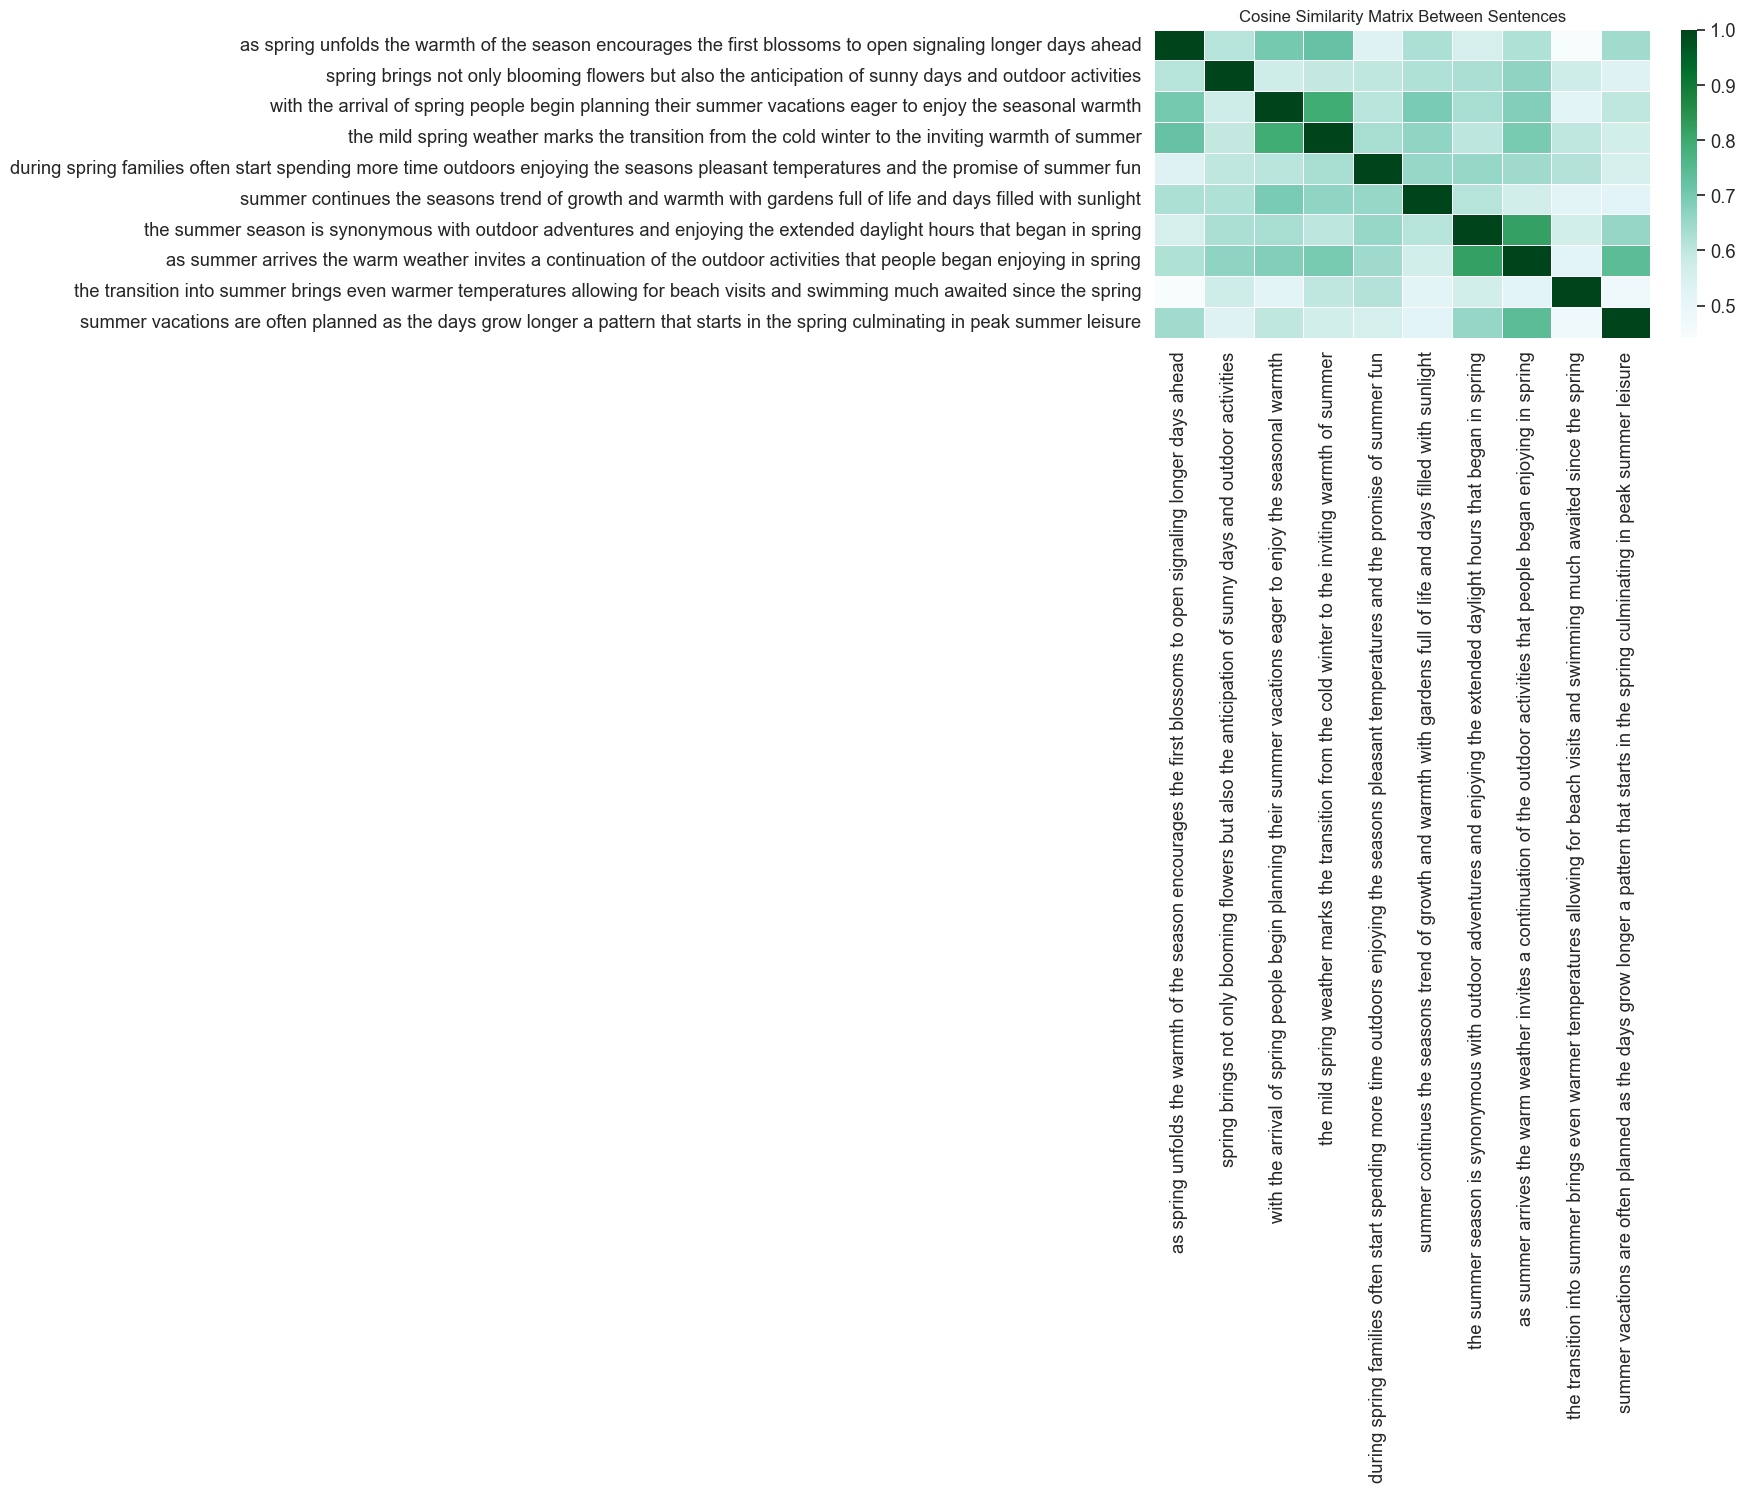

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cosineDF, 
            cmap='BuGn', # set color map Blue to Green
            annot=False, # do not show the numerical values in each cell
            linewidths=0.5) # width of lines that separate the cells in the map

# We are directly setting the properties of the current axes, without explicitely referring to it as we did in the barplot image
plt.title('Cosine Similarity Matrix Between Sentences', fontsize=12)

plt.tight_layout()
plt.show()